In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random


In [14]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

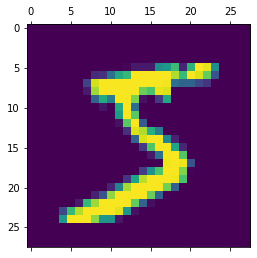

In [17]:
plt.matshow(x_train[0])

In [18]:
x_train=x_train/255
x_test=x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3385 - accuracy: 0.9053 - val_loss: 0.2948 - val_accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2894 - accuracy: 0.9186 - val_loss: 0.2609 - val_accuracy: 0.9275
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9270 - val_loss: 0.2419 - val_accuracy: 0.9313
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9343 - val_loss: 0.2206 - val_accuracy: 0.9401
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2170 - accuracy: 0.9392 - val_loss: 0.2050 - val_accuracy: 0.9424


In [26]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Accuracy=%.3f"%test_acc)
print("Loss=%.3f"%test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9424
Accuracy=0.942
Loss=0.205


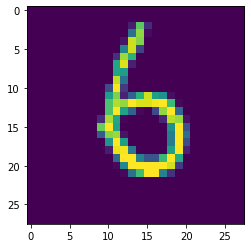

In [27]:
n=random.randint(0,9999)
plt.imshow(x_test[n])

In [28]:
predicted_val=model.predict(x_test)
print("Handwritten no=%d"%np.argmax(predicted_val[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten no=6


313/313 [==============================] - 1s 2ms/step
[1.3597503e-04 2.8021898e-07 1.9691263e-04 4.1560331e-04 5.2476164e-05
 8.1818580e-04 6.9217854e-06 6.1996417e-07 9.9628913e-01 2.0839188e-03]
Handwritten no=8


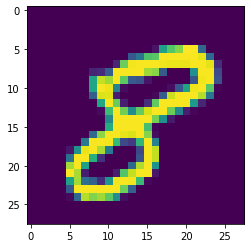

In [33]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
predicted_val=model.predict(x_test)
print(predicted_val[n])
print("Handwritten no=%d"%np.argmax(predicted_val[n]))

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

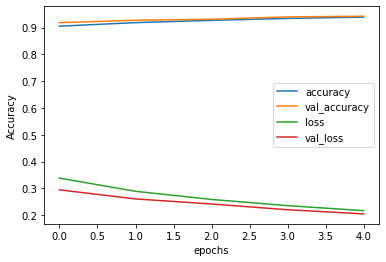

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')

plt.legend(['accuracy','val_accuracy','loss','val_loss'])

